# Global Vectors of Word Representation (GloVe)

## Pre-requisite:
- Either download the pre-trained vectors from https://nlp.stanford.edu/projects/glove/ or can also load from gensim library.
- This notebook uses the model of Wikipedia 2014 + Gigaword 5 vectors of 300 dimensions.

In [9]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import gensim.downloader as api

## Load Pre-trained model

In [4]:
glove_model = api.load('glove-wiki-gigaword-300')

[==============================================----] 92.2% 346.8/376.1MB downloaded


## Find most similar word

In [11]:
glove_model["bliss"]

array([ 3.6036e-02,  1.5715e-01,  1.0035e-02,  5.5726e-01, -2.1401e-01,
       -2.9975e-01,  1.5078e-01, -2.2666e-01, -3.7132e-01,  2.7188e-01,
        5.0163e-01,  8.9716e-04,  4.0262e-02,  5.1123e-02,  8.9384e-02,
       -7.9780e-02,  6.6442e-02, -3.9017e-01, -3.4810e-02,  5.4369e-02,
        1.9503e-01,  8.9109e-02,  1.7136e-01,  1.4657e-01, -3.2073e-01,
        2.8917e-01, -8.0736e-03,  2.8745e-01,  5.8053e-01, -2.5935e-01,
       -1.1442e-01,  3.1951e-01,  6.9187e-03, -2.4497e-01,  5.7255e-02,
        7.4776e-01,  6.2335e-02,  1.1873e-01,  3.5926e-02, -2.1211e-01,
        1.0076e+00,  4.9451e-01,  6.8345e-02, -4.6320e-02,  5.1137e-01,
       -5.6300e-01, -1.3605e-01,  3.5704e-01,  1.9769e-01, -2.4946e-01,
        5.1624e-01,  2.4210e-01,  3.0078e-01,  2.5931e-02,  2.3495e-01,
       -8.3216e-02,  4.9326e-01,  3.2227e-01,  2.7710e-01, -3.5838e-01,
        4.6342e-01,  1.9668e-01,  8.9110e-01,  1.9366e-01, -4.8668e-01,
       -1.4740e-01, -3.3749e-01, -2.9105e-01,  2.8283e-01, -1.88

In [10]:
glove_model["beautiful"].shape

(300,)

## queen - girl + boy = king

In [8]:
# uisng Eucledian
glove_model.most_similar(positive=['boy', 'queen'], negative=['girl'], topn=10)

[('king', 0.6770139932632446),
 ('monarch', 0.5442801117897034),
 ('elizabeth', 0.5344177484512329),
 ('majesty', 0.5312743186950684),
 ('ii', 0.5138020515441895),
 ('royal', 0.5046806335449219),
 ('throne', 0.4959518611431122),
 ('prince', 0.4886453151702881),
 ('princess', 0.4612610638141632),
 ('vi', 0.4535139501094818)]

## Visualize the Vectors

- t-distributed stochastic neighbor embedding (t-SNE) used to visualize vectors
- It reduces high dimensions of the data to lower dimensions which can be later visualized using matplotlib scatter plot

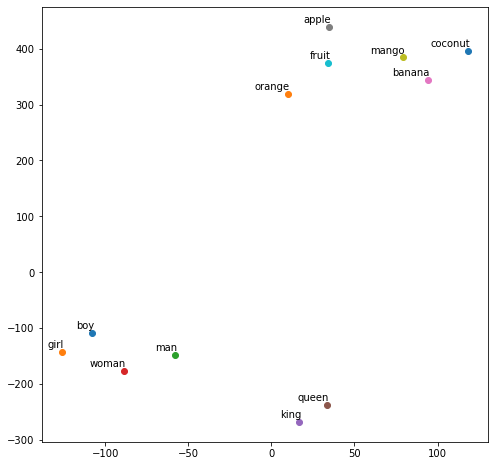

In [7]:
vocab = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange"]

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    # n_components: #dimensions to reduce the data into
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    #Use Matplotlib Scatter plot
    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(glove_model)

# END